Python Examples

In [289]:
# Read data from Excel and display using pandas
import pandas as pd

data = pd.read_csv('c:\\aaa\\titanic3.csv') 
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [1]:
# Read data from SQL Server
import pyodbc
import sqlalchemy as sa
import pandas as pd
from sqlalchemy.engine import URL       # To support pandas
from sqlalchemy import create_engine    # To support pandas
import seaborn as sns
import matplotlib.pyplot as plt

# server parameters
server = 'BSQL' 
database = 'DBA' 
username = 'naya5' 
password = '9451P9Qt%&h!'
conn_string =  'DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password

conn = pyodbc.connect(conn_string)
conn_url = URL.create("mssql+pyodbc", query={"odbc_connect": conn_string}) # To support pandas

query = ("select "
            "server, "
            "database_name, "
            "last_successful_log_restore, "
            "datediff(minute, last_successful_log_restore, getdate()) as minutes_since_last_restored "
        "from "
        "( "
        "select "
            "@@SERVERNAME as Server, "
            "b.database_name, "
            "max(a.restore_date) last_successful_log_restore "
        "from msdb..restorehistory a "
        "INNER JOIN msdb..backupset b ON a.backup_set_id = b.backup_set_id "
        "where  "
            "b.database_name IN ('Cetentities','cetgroups3','Common','Lms','Cetstore') "
        "group by b.database_name "
        ") a "
        )

# --- Print to terminal ---
#cursor = conn.cursor()
#cursor.execute(query)

#for i in cursor:
#    print(i)
# --- Print to terminal ---

# --- Print using pandas dataframe ---
engine = sa.create_engine(conn_url)
df = pd.read_sql(query, engine)
df.head()
# --- Print using pandas dataframe ---


InterfaceError: ('28000', "[28000] [Microsoft][ODBC SQL Server Driver][SQL Server]Login failed for user 'naya5'. (18456) (SQLDriverConnect); [28000] [Microsoft][ODBC SQL Server Driver][SQL Server]Login failed for user 'naya5'. (18456)")

In [297]:
# Read data from MongoDB
from pymongo import MongoClient
import pandas as pd
import numpy as np
from tabulate import tabulate

# MongoDB connection string
myClient = MongoClient(
    host='172.17.30.23:27017',
    serverSelectionTimeoutMS=3000,
    username="sa",
    password="global11!"
)

# Select Database and Collection
myDB = myClient["test"]
myCollection = myDB["demo"]

# Query collection test.demo for number = '1000-10'
myQuery = {
        "balance" : {
            "$gte" : 20,
            "$lte" : 30
        }
    }

# Run query (using sort and limit)
myDoc = myCollection.find(myQuery).sort("balance", -1).limit(10)  # -1 descending

# Print using Pandas and tabulate
entries = list(myDoc)
df = pd.DataFrame(entries, columns = ['id', 'number', 'currency', 'balance'])
# print(tabulate(df, headers='keys', tablefmt='psql'))

# Print using pandas only (will work only inside a notebook)
df

# Print the results to the console
# for x in myDoc:
#    print(x)

,id,number,currency,balance
0,NaN,1000-158726,EUR,29.948151
1,NaN,1000-93138,EUR,28.781703
2,NaN,1000-122003,EUR,28.716396
3,NaN,1000-7179,EUR,27.403836
4,NaN,1000-127754,EUR,26.594524
5,NaN,1000-154260,EUR,26.324920
6,NaN,1000-110635,EUR,26.177112
7,NaN,1000-167358,EUR,24.273656
8,NaN,1000-163555,EUR,24.210045
9,NaN,1000-101249,EUR,23.525116


In [ ]:
# Display Graphs
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])


In [1]:
# Log Shipping bar graph from SQL Server
import pyodbc
import sqlalchemy as sa
import pandas as pd
from sqlalchemy.engine import URL       # To support pandas
from sqlalchemy import create_engine    # To support pandas
import seaborn as sns
import matplotlib.pyplot as plt

# server parameters
server = 'BSQL' 
database = 'DBA' 
username = 'naya5' 
password = '9451P9Qt%&h!'
conn_string =  'DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password

conn = pyodbc.connect(conn_string)
conn_url = URL.create("mssql+pyodbc", query={"odbc_connect": conn_string}) # To support pandas

query = ("select "
            # "server, "
            "database_name, "
            "db_name, "
            # "last_successful_log_restore, "
            "datediff(minute, last_successful_log_restore, getdate()) as minutes_since_last_restored "
        "from "
        "( "
        "select "
            # "@@SERVERNAME as Server, "
            "b.database_name, "
            "b.database_name as db_name, "
            "max(a.restore_date) last_successful_log_restore "
        "from msdb..restorehistory a "
        "INNER JOIN msdb..backupset b ON a.backup_set_id = b.backup_set_id "
        "where  "
            "b.database_name IN ('Cetentities','cetgroups3','Common','Lms','Cetstore') "
        "group by b.database_name "
        ") a "
        )

# --- Print to terminal ---
#cursor = conn.cursor()
#cursor.execute(query)

#for i in cursor:
#    print(i)
# --- Print to terminal ---




# Execute the query
engine = sa.create_engine(conn_url)
df = pd.read_sql(query, engine)

# Display in grid using pandas
print(df)

# --- Print bar graph using pandas dataframe ---
t=df.groupby(['database_name', 'db_name'])['minutes_since_last_restored'].sum().unstack('database_name').fillna(0)
t.plot(kind='bar', stacked=True, legend=None)

plt.title('BSQL Log Shipping Sync Time')
plt.xlabel('Database')
plt.ylabel('Minutes Since Last Transaction Log was Restored')

# --- Print bar graph using pandas dataframe ---


InterfaceError: ('28000', "[28000] [Microsoft][ODBC SQL Server Driver][SQL Server]Login failed for user 'naya5'. (18456) (SQLDriverConnect); [28000] [Microsoft][ODBC SQL Server Driver][SQL Server]Login failed for user 'naya5'. (18456)")

            database_name  sizeOnDisk
0              CETFolders        0.02
1          CETFolders-bzq        0.00
2                CETItems       68.23
3                 CETLogs        0.00
4         CETProfiles-bzq        0.00
5             CETServices     1082.80
6                CETTrees        1.35
7            CETTrees-bzq        0.51
8           CosmosCreator        0.66
9       CosmosCreator-bzq        0.17
10             MsActivity       16.88
11         MsActivity-bzq        4.38
12              MsCookies        0.15
13          MsCookies-bzq        0.03
14  MsRecomemndations-bzq        0.04
15      MsRecommendations        0.11
16          ProductPlayer        0.22
17      ProductPlayer-bzq        0.11
18       ProductplayerBAK        0.00
19                  admin        0.00
20                 config        0.00
21         learninglocker        3.85
22                  local        0.00
23                   test        0.01


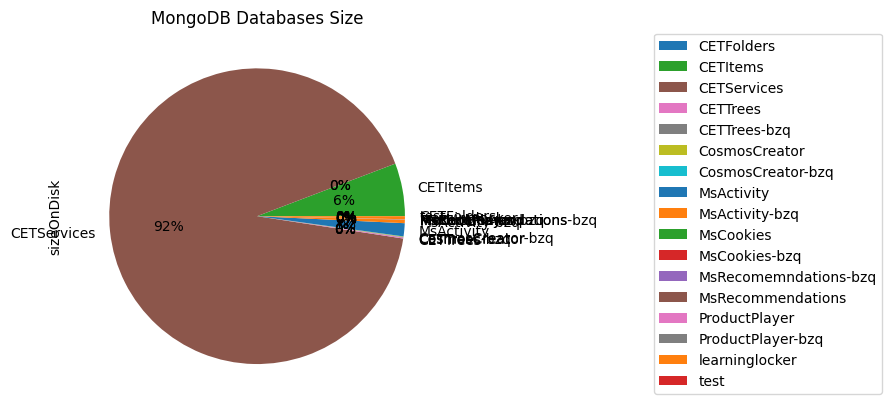

In [300]:
# Databases size bar graph from MongoDB
from pymongo import MongoClient
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

# MongoDB connection string
myClient = MongoClient(
    host='172.17.30.23:27017',
    serverSelectionTimeoutMS=3000,
    username="sa",
    password="global11!"
)

# Set pandas dataframe with 2 cols
df = pd.DataFrame(columns=['database_name','sizeOnDisk'])

# Iterate over all databases and populate the dataframe
for dbname in enumerate(myClient.list_databases()):
    # print("database name is : ",dbname) # This is the original tupple
    database_name = dbname[1].get('name')
    size_on_disk  = dbname[1].get('sizeOnDisk')
    # print("database: ", database_name, ", Size: ", round(size_on_disk/1024/1024/1024,2), ' GB')
    
    # Populate the dataframe
    record = {'database': database_name, 'sizeOnDisk': size_on_disk }

    entry = pd.DataFrame.from_dict({
     "database_name": [database_name],
     "sizeOnDisk":  [round(size_on_disk/1024/1024/1024,2)]
    })
    df = pd.concat([df, entry], ignore_index=True)

print(df)

# Display as graph
df.groupby(['database_name']).sum().plot(kind='pie', y='sizeOnDisk', autopct='%1.0f%%', title='MongoDB Databases Size')
plt.legend(bbox_to_anchor=(1.50,0.5), loc="center right", fontsize=10, bbox_transform=plt.gcf().transFigure)
